In [1]:
# 02_cars_linear_regression
# X : 'speed' (속도)  , Y : 'dist' (제동거리) , 단항 회귀

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(5)

# 데이터 읽어오기
xy = np.loadtxt('data-01-cars.csv', unpack=True, delimiter=',', skiprows=1)
x_train = xy[0]
y_train = xy[1]

In [5]:
# 변수 초기화 : weight, bias
# tf.random.normal([1]) : 난수 1개를 생성
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# W,b

(<tf.Variable 'weight:0' shape=(1,) dtype=float32, numpy=array([1.3506279], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-1.1078699], dtype=float32)>)

In [6]:
# 예측 함수 (hypothesis) : H(x) = W*X + b
def hypothesis(X):
    return X*W + b

In [7]:
# 비용 함수 : (H(X) - Y)^2 의 평균
# tf.square() : 제곱
# tf.reduce_mean() : 평균

def cost_func():
    cost = tf.reduce_mean(tf.square(hypothesis(x_train) - y_train))
    return cost

In [8]:
# 경사 하강법
# learning_rate(학습율)을 0.01로 설정하여 optimizer 객체를 생성

# optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
# optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.01)   # 성능이 향상됨 _ AdamOptimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [10]:
# 학습 시작
print('****** Start Learning !!')
for step in range(10001):
    # cost를 minimize한다
    optimizer.minimize(cost_func, var_list=[W,b])
    
    if step % 100 == 0:
        print('%04d'%step,'cost:[',cost_func().numpy(),']',
             ' W:',W.numpy(),' b:',b.numpy())
    
print('****** Start Finishing !!')

****** Start Learning !!
0000 cost:[ 943.02423 ]  W: [1.3606279]  b: [-1.0978699]
0100 cost:[ 387.93713 ]  W: [2.2233443]  b: [-0.25027925]
0200 cost:[ 271.57382 ]  W: [2.6882439]  b: [0.13547535]
0300 cost:[ 260.19534 ]  W: [2.8535628]  b: [0.14591318]
0400 cost:[ 259.05276 ]  W: [2.8979273]  b: [-0.01708043]
0500 cost:[ 258.21823 ]  W: [2.9156008]  b: [-0.24125907]
0600 cost:[ 257.3096 ]  W: [2.9309118]  b: [-0.4955904]
0700 cost:[ 256.3327 ]  W: [2.9472854]  b: [-0.77373046]
0800 cost:[ 255.29822 ]  W: [2.9649081]  b: [-1.0734141]
0900 cost:[ 254.21574 ]  W: [2.9836922]  b: [-1.3929199]
1000 cost:[ 253.09445 ]  W: [3.0035458]  b: [-1.7306844]
1100 cost:[ 251.94293 ]  W: [3.024383]  b: [-2.0852396]
1200 cost:[ 250.76913 ]  W: [3.0461206]  b: [-2.455184]
1300 cost:[ 249.58087 ]  W: [3.068679]  b: [-2.839163]
1400 cost:[ 248.38539 ]  W: [3.0919802]  b: [-3.2358549]
1500 cost:[ 247.18958 ]  W: [3.1159484]  b: [-3.6439629]
1600 cost:[ 245.99977 ]  W: [3.1405072]  b: [-4.062212]
1700 cost

In [12]:
# 회귀계수, weight과 bias 출력
print('weight:', W.numpy())
print('bias:', b.numpy())

weight: [3.9324062]
bias: [-17.579052]


In [17]:
# 예측
print('****** Predict')
# 속도가 30과 50일 떄 제동거리를 예측해 보세요
print('speed=30, dist=',hypothesis(30).numpy())   # 3.9324062 * 30 -17.579052 한 거
print('speed=50, dist=',hypothesis(50).numpy())

# X = [10,11,12,24,25] 일 때
print('speed=[10,11,12,24,25], dist=',hypothesis([10,11,12,24,25]).numpy())

****** Predict
speed=30, dist= [100.39313]
speed=50, dist= [179.04126]
speed=[10,11,12,24,25], dist= [21.74501  25.677418 29.609821 76.79869  80.73111 ]


D:\AllProgram\anaconda3\envs\tf250\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


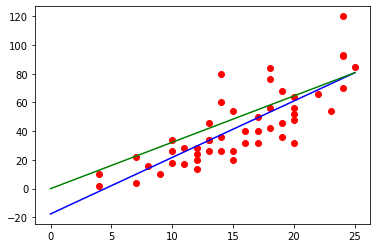

In [23]:
# 시각화 : matplotlib 사용
def prediction(X,W,b):
    return X*W + b

plt.plot(x_train,y_train,'ro')   # red, 원본 데이터
plt.plot((0,25),(prediction(0,W,b),prediction(25,W,b)),'b')   # blue, 예측 함수 (직선)
plt.plot((0,25),(0,prediction(25,W,b)),'g')           # green, 최저 예측값을 0으로 수정
plt.show()